# Housing Dataset 

### Getting Started (uploading information) 

In [15]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

In [28]:
# Load the Housing data
Housing = pd.read_csv('Housing.csv')
Housing.head()
data = pd.read_csv('Housing.csv')

In [29]:
features = Housing[['mainroad', 'guestroom', 'basement', 'hotwaterheating', 'airconditioning', 
                       'prefarea', 'furnishingstatus']]
data_preprocessed = pd.get_dummies(data, columns=categorical_columns, drop_first=True)

In [30]:
# Split the data into features (X) and target (y)
X = data_preprocessed.drop('price', axis=1)
y = data_preprocessed['price']

In [31]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

###  Implementing an ordinary least squares linear regression model

In [32]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Initialize the model
model = LinearRegression()

# Train the model
model.fit(X_train, y_train)

# Predict on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

# Hi brett, I am not sure what this means. I am confused on how to change this code to make apply better 
#to the data

Mean Squared Error: 1754318687330.6643
R^2 Score: 0.6529242642153184


### Solving regression for regression parameters with gradient descent 

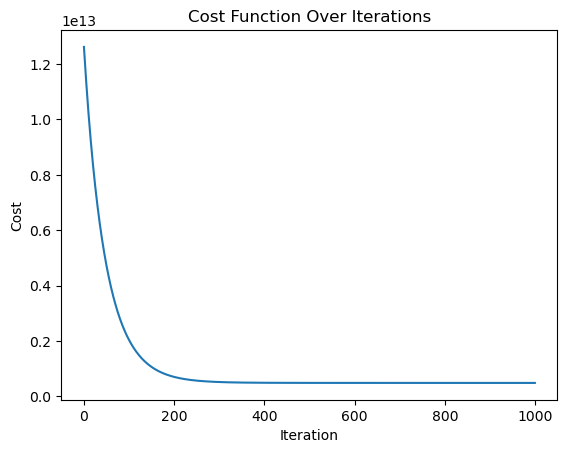

In [35]:
# Feature scaling for gradient descent
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data_preprocessed.drop('price', axis=1))

cost_history = []  # Initializing cost_history here

# Adding intercept term
X = np.c_[np.ones(data_scaled.shape[0]), data_scaled]  # Add intercept term to X
y = data_preprocessed['price'].values

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Gradient Descent Parameters
alpha = 0.01  # Learning rate
iterations = 1000  # Number of iterations
m = y_train.size  # Number of training examples
np.random.seed(42)  # Seed for reproducibility
theta = np.random.rand(X_train.shape[1])  # Initializing theta with random values

for _ in range(iterations):
    predictions = X_train.dot(theta)
    errors = predictions - y_train
    cost = (1/(2*m)) * np.dot(errors.T, errors)
    cost_history.append(cost)
    gradient = (1/m) * X_train.T.dot(errors)
    theta -= alpha * gradient

# Plotting the cost history
plt.plot(cost_history)
plt.xlabel('Iteration')
plt.ylabel('Cost')
plt.title('Cost Function Over Iterations')
plt.show()

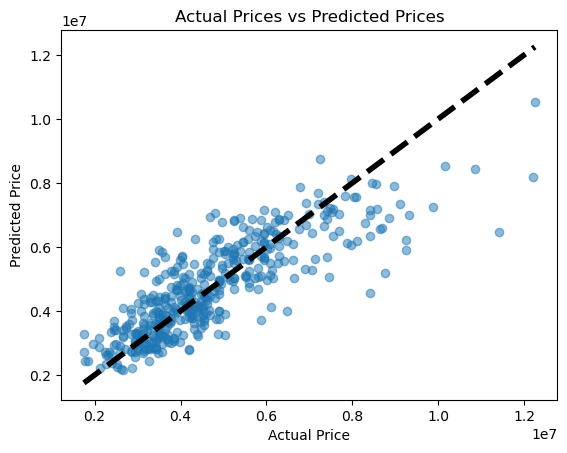

In [36]:
import matplotlib.pyplot as plt

# Using the model to predict prices on the training set
y_pred = X_train.dot(theta)

# Scatter plot of actual prices vs predicted prices
plt.scatter(y_train, y_pred, alpha=0.5)
plt.xlabel('Actual Price')
plt.ylabel('Predicted Price')
plt.title('Actual Prices vs Predicted Prices')
plt.plot([y_train.min(), y_train.max()], [y_train.min(), y_train.max()], 'k--', lw=4)
plt.show()

### Fitting a robust regression model using RANSAC 

In [37]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import make_pipeline
from sklearn.linear_model import RANSACRegressor

In [38]:
# Load the Housing data
Housing = pd.read_csv('Housing.csv')
Housing.head()
data = pd.read_csv('Housing.csv')

In [39]:
# Preprocess the data
# Separating features and target variable
X = data.drop('price', axis=1)
y = data['price']

In [40]:
# Handling categorical variables and scaling
categorical_features = X.select_dtypes(include=['object']).columns
numerical_features = X.select_dtypes(exclude=['object']).columns

In [41]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [42]:
# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [43]:
# Create a RANSAC Regressor model
ransac = make_pipeline(preprocessor, RANSACRegressor(random_state=42))

In [44]:
# Train the model
ransac.fit(X_train, y_train)

# Predict on the testing set
y_pred = ransac.predict(X_test)

In [45]:
# Evaluate the model's performance
# You can use metrics such as mean squared error or R^2 score here
from sklearn.metrics import mean_squared_error, r2_score
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2022871570067.0374
R^2 Score: 0.5997935588047479


In [46]:
# Access the RANSACRegressor from the pipeline
ransac_regressor = ransac.named_steps['ransacregressor']

# Access the underlying linear model used by RANSAC
linear_model = ransac_regressor.estimator_

# Retrieve the slope (coefficients) and intercept
slope = linear_model.coef_
intercept = linear_model.intercept_

print(f'Slope: {slope}')
print(f'Intercept: {intercept}')
# BRETT: this doesn't look like the book...

Slope: [ 469482.39110731  111120.21168571  560956.64610106  173943.2436663
  131257.94446678  -41808.56109473   41808.56109473 -209258.39947867
  209258.39947867 -123392.3809007   123392.3809007  -517748.18971585
  517748.18971585 -320666.85311472  320666.85311472 -357124.17364496
  357124.17364496  256233.68230914  140309.47451842 -396543.15682756]
Intercept: 5471058.849627901


### Ridge Regression 

In [47]:
from sklearn.linear_model import Ridge
from sklearn.metrics import mean_squared_error, r2_score

# Create a Ridge regression model
ridge_model = make_pipeline(preprocessor, Ridge(alpha=1.0))

# Train the model
ridge_model.fit(X_train, y_train)

# Predict on the testing set
y_pred_ridge = ridge_model.predict(X_test)

# Evaluate the model's performance
mse_ridge = mean_squared_error(y_test, y_pred_ridge)
r2_ridge = r2_score(y_test, y_pred_ridge)

print(f'Ridge Regression - Mean Squared Error: {mse_ridge}')
print(f'Ridge Regression - R^2 Score: {r2_ridge}')


Ridge Regression - Mean Squared Error: 1756731438876.3635
Ridge Regression - R^2 Score: 0.6524469236249018


### Lasso Regression 

In [50]:
from sklearn.linear_model import Lasso
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score

# Define the LASSO regression model
lasso = Lasso(alpha=1.0)

# Create a pipeline that first preprocesses the data and then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', lasso)])
# Fit the LASSO model
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 1754323091682.8684
R^2 Score: 0.6529233928549475


### Elastic Net regression 

In [51]:
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import Pipeline

# Define the Elastic Net regression model
elastic_net = ElasticNet(alpha=1.0, l1_ratio=0.5) # l1_ratio = 0.5 gives equal weight to L1 and L2 regularization

# Create a pipeline that first preprocesses the data and then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', elastic_net)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the Elastic Net model
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 2164402073728.905
R^2 Score: 0.5717930569294802


### Turning a linear regression model into a curve - polynomial regression 

In [72]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, OneHotEncoder
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
import pandas as pd

# Load the Housing data
Housing = pd.read_csv('Housing.csv')
Housing.head()
data = pd.read_csv('Housing.csv')

# Select a single feature and the target variable
# Replace 'feature_name' with your actual feature name
X = data[['area']]  # Example feature
y = data['price']   # Target variable

# Preprocessing: Numeric and categorical transformations
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X.select_dtypes(include=['object']).columns

numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler()),
    ('poly', PolynomialFeatures(degree=2, include_bias=False))
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')

preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
    ])

# Define the regression model
model = LinearRegression()

# Create a pipeline that first preprocesses the data and then fits the model
pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                           ('regressor', model)])

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the polynomial regression model
pipeline.fit(X_train, y_train)

# Predict on the test data
y_pred = pipeline.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')


Mean Squared Error: 3562004338817.5825
R^2 Score: 0.2952903678838149


C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(
C:\Users\user\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but PolynomialFeatures was fitted with feature names
  warnings.warn(


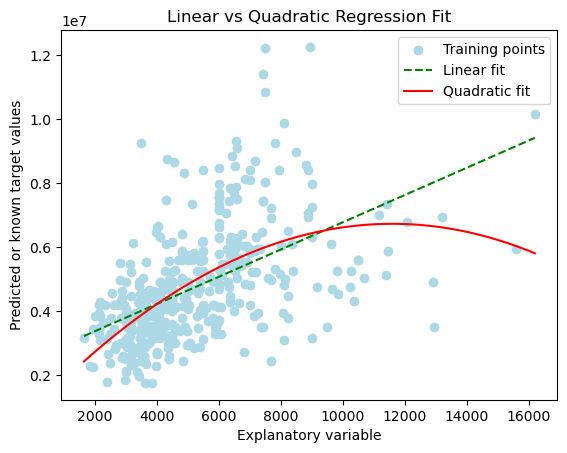

In [66]:

# Select a single feature and the target variable
X = data[['area']]  # Example feature
y = data['price']   # Target variable

# Splitting the dataset for demonstration
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Fit the linear model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

# Fit the quadratic model
quadratic_model = make_pipeline(PolynomialFeatures(2), LinearRegression())
quadratic_model.fit(X_train, y_train)

# Generate a range of values for plotting
X_range = np.linspace(X.min(), X.max(), 100).reshape(-1, 1)

# Predictions from both models
linear_pred = linear_model.predict(X_range)
quadratic_pred = quadratic_model.predict(X_range)

# Plotting
plt.scatter(X_train, y_train, color='lightblue', label='Training points')
plt.plot(X_range, linear_pred, 'g--', label='Linear fit')
plt.plot(X_range, quadratic_pred, 'r-', label='Quadratic fit')
plt.xlabel('Explanatory variable')
plt.ylabel('Predicted or known target values')
plt.title('Linear vs Quadratic Regression Fit')
plt.legend()
plt.show()


### Decision tree regression 

In [68]:
import pandas as pd
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import ColumnTransformer

# Load the Housing data
Housing = pd.read_csv('Housing.csv')
Housing.head()
data = pd.read_csv('Housing.csv')

In [70]:
# Preprocessing the data: Convert all categorical variables into dummy/one-hot encoded variables
# Replace 'categorical_features' with the actual names of the categorical features in your dataset
categorical_features = data.select_dtypes(include=['object']).columns
numeric_features = data.select_dtypes(include=['int64', 'float64']).columns

preprocessor = ColumnTransformer(
    transformers=[
        ('num', 'passthrough', numeric_features),
        ('cat', OneHotEncoder(), categorical_features)
    ])

In [73]:
# Select a single feature and the target variable
# Replace 'feature_name' with your actual feature name
X = data[['area']]  # Example feature
y = data['price']   # Target variable

In [74]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize the DecisionTreeRegressor
dt_regressor = DecisionTreeRegressor(random_state=42)

# Train the model
dt_regressor.fit(X_train, y_train)

# Predict on the testing set
y_pred = dt_regressor.predict(X_test)

# Evaluate the model's performance
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f'Mean Squared Error: {mse}')
print(f'R^2 Score: {r2}')

Mean Squared Error: 3680624743980.632
R^2 Score: 0.27182241722105016


### Random forest regression 

In [75]:
from sklearn.ensemble import RandomForestRegressor

In [76]:
# Initialize the RandomForestRegressor with 100 trees
rf_regressor = RandomForestRegressor(n_estimators=100, random_state=42)

# Train the model on the training data
rf_regressor.fit(X_train, y_train)

# Predict on the testing data
y_pred_rf = rf_regressor.predict(X_test)

# Evaluate the model's performance
mse_rf = mean_squared_error(y_test, y_pred_rf)
r2_rf = r2_score(y_test, y_pred_rf)

print(f'Mean Squared Error (Random Forest): {mse_rf}')
print(f'R-squared Score (Random Forest): {r2_rf}')

Mean Squared Error (Random Forest): 3469667662407.257
R-squared Score (Random Forest): 0.3135583257733756
